<a href="https://colab.research.google.com/github/RockhoRockho/Deep_Learning_Tensorflow/blob/main/_5_%ED%85%90%EC%84%9C%ED%94%8C%EB%A1%9C%EC%9A%B0_Data_API.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data API

- `tf.data`: https://www.tensorflow.org/api_docs/python/tf/data
- `tf.data.datasets`



## tf.data.datasets

In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds

In [2]:
builders = tfds.list_builders()
print(builders)

['abstract_reasoning', 'accentdb', 'aeslc', 'aflw2k3d', 'ag_news_subset', 'ai2_arc', 'ai2_arc_with_ir', 'amazon_us_reviews', 'anli', 'arc', 'bair_robot_pushing_small', 'bccd', 'beans', 'big_patent', 'bigearthnet', 'billsum', 'binarized_mnist', 'binary_alpha_digits', 'blimp', 'bool_q', 'c4', 'caltech101', 'caltech_birds2010', 'caltech_birds2011', 'cars196', 'cassava', 'cats_vs_dogs', 'celeb_a', 'celeb_a_hq', 'cfq', 'chexpert', 'cifar10', 'cifar100', 'cifar10_1', 'cifar10_corrupted', 'citrus_leaves', 'cityscapes', 'civil_comments', 'clevr', 'clic', 'clinc_oos', 'cmaterdb', 'cnn_dailymail', 'coco', 'coco_captions', 'coil100', 'colorectal_histology', 'colorectal_histology_large', 'common_voice', 'coqa', 'cos_e', 'cosmos_qa', 'covid19sum', 'crema_d', 'curated_breast_imaging_ddsm', 'cycle_gan', 'deep_weeds', 'definite_pronoun_resolution', 'dementiabank', 'diabetic_retinopathy_detection', 'div2k', 'dmlab', 'downsampled_imagenet', 'dsprites', 'dtd', 'duke_ultrasound', 'emnist', 'eraser_multi_r

In [3]:
data, info = tfds.load('mnist', with_info=True)
train_data, test_data = data['train'], data['test']

local data directory. If you'd instead prefer to read directly from our public
GCS bucket (recommended if you're running on GCP), you can instead pass
`try_gcs=True` to `tfds.load` or set `data_dir=gs://tfds-data/datasets`.



Dl Completed...:   0%|          | 0/4 [00:00<?, ? file/s]


Dataset mnist downloaded and prepared to /root/tensorflow_datasets/mnist/3.0.1. Subsequent calls will reuse this data.


In [4]:
print(info)

tfds.core.DatasetInfo(
    name='mnist',
    version=3.0.1,
    description='The MNIST database of handwritten digits.',
    homepage='http://yann.lecun.com/exdb/mnist/',
    features=FeaturesDict({
        'image': Image(shape=(28, 28, 1), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=10),
    }),
    total_num_examples=70000,
    splits={
        'test': 10000,
        'train': 60000,
    },
    supervised_keys=('image', 'label'),
    citation="""@article{lecun2010mnist,
      title={MNIST handwritten digit database},
      author={LeCun, Yann and Cortes, Corinna and Burges, CJ},
      journal={ATT Labs [Online]. Available: http://yann.lecun.com/exdb/mnist},
      volume={2},
      year={2010}
    }""",
    redistribution_info=,
)



## tf.data

- 생성
  - `from_tensor_slices()`: 개별 또는 다중 넘파이를 받고, 배치를 지원

  - `from_tensors()`: 배치를 지원하지 않음

  - `from_generator()`: 생성자 함수에서 입력을 취함

- 변환

  - `batch()`: 순차적으로 지정한 배치사이즈로 데이터셋을 분할

  - `repeat()`: 데이터를 복제

  - `shuffle()`: 데이터를 무작위로 섞음

  - `map()`: 데이터에 함수를 적용

  - `filter()`: 데이터를 거르고자 할 때 사용
- 반복
  - `next_batch = iterator.get_next()` 사용

### from_tensor_slices

In [5]:
import numpy as np

In [6]:
num_items = 20
num_list = np.arange(num_items)

In [7]:
num_list_dataset = tf.data.Dataset.from_tensor_slices(num_list)

In [8]:
num_list_dataset

<TensorSliceDataset shapes: (), types: tf.int64>

In [9]:
for item in num_list_dataset:
  print(item)

tf.Tensor(0, shape=(), dtype=int64)
tf.Tensor(1, shape=(), dtype=int64)
tf.Tensor(2, shape=(), dtype=int64)
tf.Tensor(3, shape=(), dtype=int64)
tf.Tensor(4, shape=(), dtype=int64)
tf.Tensor(5, shape=(), dtype=int64)
tf.Tensor(6, shape=(), dtype=int64)
tf.Tensor(7, shape=(), dtype=int64)
tf.Tensor(8, shape=(), dtype=int64)
tf.Tensor(9, shape=(), dtype=int64)
tf.Tensor(10, shape=(), dtype=int64)
tf.Tensor(11, shape=(), dtype=int64)
tf.Tensor(12, shape=(), dtype=int64)
tf.Tensor(13, shape=(), dtype=int64)
tf.Tensor(14, shape=(), dtype=int64)
tf.Tensor(15, shape=(), dtype=int64)
tf.Tensor(16, shape=(), dtype=int64)
tf.Tensor(17, shape=(), dtype=int64)
tf.Tensor(18, shape=(), dtype=int64)
tf.Tensor(19, shape=(), dtype=int64)


### from_generator()
- 해당 클래스 메서드를 사용하면 생성자에서 데이터셋 생성 가능
- output_types, output_shapes 인수로 출력 자료형과 크기를 지정해주어야 함

In [10]:
import itertools

def gen():
  for i in itertools.count(1):
    yield (i, [1] * i)

dataset = tf.data.Dataset.from_generator(
    gen,
    (tf.int64, tf.int64),
    (tf. TensorShape([])  , tf.TensorShape([None]))
)

list(dataset.take(3).as_numpy_iterator())

[(1, array([1])), (2, array([1, 1])), (3, array([1, 1, 1]))]

In [11]:
# for item in dataset:
#   print(item)

In [12]:
def gen(stop):
  for i in itertools.count(1):
    if i < stop:
      yield (i, [1] * i)

dataset = tf.data.Dataset.from_generator(
    gen, args=[10],
    output_types=(tf.int64, tf.int64),
    output_shapes=(tf.TensorShape([]), tf.TensorShape([None]))
)

list(dataset.take(5).as_numpy_iterator())

[(1, array([1])),
 (2, array([1, 1])),
 (3, array([1, 1, 1])),
 (4, array([1, 1, 1, 1])),
 (5, array([1, 1, 1, 1, 1]))]

### batch, repeat
- `batch()`: 배치 사이즈 크기
- `repeat()`: 반복 횟수

In [13]:
dataset = num_list_dataset.repeat(3).batch(7)

In [14]:
for item in dataset:
  print(item)

tf.Tensor([0 1 2 3 4 5 6], shape=(7,), dtype=int64)
tf.Tensor([ 7  8  9 10 11 12 13], shape=(7,), dtype=int64)
tf.Tensor([14 15 16 17 18 19  0], shape=(7,), dtype=int64)
tf.Tensor([1 2 3 4 5 6 7], shape=(7,), dtype=int64)
tf.Tensor([ 8  9 10 11 12 13 14], shape=(7,), dtype=int64)
tf.Tensor([15 16 17 18 19  0  1], shape=(7,), dtype=int64)
tf.Tensor([2 3 4 5 6 7 8], shape=(7,), dtype=int64)
tf.Tensor([ 9 10 11 12 13 14 15], shape=(7,), dtype=int64)
tf.Tensor([16 17 18 19], shape=(4,), dtype=int64)


In [15]:
dataset = num_list_dataset.repeat(3).batch(7, drop_remainder=True)

In [16]:
for item in dataset:
  print(item)

tf.Tensor([0 1 2 3 4 5 6], shape=(7,), dtype=int64)
tf.Tensor([ 7  8  9 10 11 12 13], shape=(7,), dtype=int64)
tf.Tensor([14 15 16 17 18 19  0], shape=(7,), dtype=int64)
tf.Tensor([1 2 3 4 5 6 7], shape=(7,), dtype=int64)
tf.Tensor([ 8  9 10 11 12 13 14], shape=(7,), dtype=int64)
tf.Tensor([15 16 17 18 19  0  1], shape=(7,), dtype=int64)
tf.Tensor([2 3 4 5 6 7 8], shape=(7,), dtype=int64)
tf.Tensor([ 9 10 11 12 13 14 15], shape=(7,), dtype=int64)


### map, filter
- 전처리 단계에서 시행하여 원하지 않는 데이터를 거를 수 있음

- `tf.Tensor` 자료형을 다룸

In [17]:
from tensorflow.data import Dataset

In [18]:
dataset = Dataset.range(1, 6)
dataset = dataset.map(lambda x: x * 2)
list(dataset.as_numpy_iterator())

[2, 4, 6, 8, 10]

In [19]:
dataset = Dataset.range(5)

result = dataset.map(lambda x: x + 1)

result

<MapDataset shapes: (), types: tf.int64>

In [20]:
elements = [(1, 'one'), (2, 'two'), (3, 'three')]
dataset = Dataset.from_generator(lambda: elements, (tf.int32, tf.string))
result = dataset.map(lambda x_int, y_str: x_int)
list(result.as_numpy_iterator())

[1, 2, 3]

In [21]:
dataset = Dataset.range(3)

def g(x):
  return tf.constant(10.5), tf.constant(["One", "Two", "Three"])

result = dataset.map(g)
result.element_spec

(TensorSpec(shape=(), dtype=tf.float32, name=None),
 TensorSpec(shape=(3,), dtype=tf.string, name=None))

In [22]:
def h(x):
  return 10.5, ["One", "Two", "Three"], np.array([1.0, 2.0], dtype=np.float64)

result = dataset.map(h)
result.element_spec

(TensorSpec(shape=(), dtype=tf.float32, name=None),
 TensorSpec(shape=(3,), dtype=tf.string, name=None),
 TensorSpec(shape=(2,), dtype=tf.float64, name=None))

In [23]:
def i(x):
  return (10.5, [12.5, 11.1]), "One", "Two"

result = dataset.map(i)
result.element_spec

((TensorSpec(shape=(), dtype=tf.float32, name=None),
  TensorSpec(shape=(2,), dtype=tf.float32, name=None)),
 TensorSpec(shape=(), dtype=tf.string, name=None),
 TensorSpec(shape=(), dtype=tf.string, name=None))

In [24]:
dataset = Dataset.from_tensor_slices([1, 2, 3])
dataset = dataset.filter(lambda x :x < 3)
list(dataset.as_numpy_iterator())

[1, 2]

In [25]:
def filter_fn(x):
  return tf.math.equal(x, 1)

dataset = dataset.filter(filter_fn)
list(dataset.as_numpy_iterator())

[1]

### shuffle, take

In [26]:
dataset, info = tfds.load('imdb_reviews', with_info=True, as_supervised=True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteS4KNZF/imdb_reviews-train.tfrecord


  0%|          | 0/25000 [00:00<?, ? examples/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteS4KNZF/imdb_reviews-test.tfrecord


  0%|          | 0/25000 [00:00<?, ? examples/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteS4KNZF/imdb_reviews-unsupervised.tfrecord


  0%|          | 0/50000 [00:00<?, ? examples/s]

Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0. Subsequent calls will reuse this data.


In [27]:
train_dataset = dataset['train']
train_dataset = train_dataset.batch(5).shuffle(5).take(2)

for data in train_dataset:
  print(data)

(<tf.Tensor: shape=(5,), dtype=string, numpy=
array([b'It was disgusting and painful. What a waste of a cast! I swear, the audience (1/2 full) laughed TWICE in 90 minutes. This is not a lie. Do not even rent it.<br /><br />Zeta Jones was just too mean to be believable.<br /><br />Cusack was OK. Just OK. I felt sorry for him (the actor) in case people remember this mess.<br /><br />Roberts was the same as she always is. Charming and sweet, but with no purpose. The "romance" with John was completely unbelievable.',
       b'This is a straight-to-video movie, so it should go without saying that it\'s not going to rival the first Lion King, but that said, this was downright good.<br /><br />My kids loved this, but that\'s a given, they love anything that\'s a cartoon. The big shock was that *I* liked it too, it was laugh out loud funny at some parts (even the fart jokes*), had lots of rather creative tie-ins with the first movie, and even some jokes that you had to be older to understand (

### get_next()

In [28]:
dataset = Dataset.range(2)
for element in dataset:
  print(element)

tf.Tensor(0, shape=(), dtype=int64)
tf.Tensor(1, shape=(), dtype=int64)


In [29]:
dataset = Dataset.range(2)
iterator = iter(dataset)

print(dataset)
print(iterator.get_next())
print(iterator.get_next())

<RangeDataset shapes: (), types: tf.int64>
tf.Tensor(0, shape=(), dtype=int64)
tf.Tensor(1, shape=(), dtype=int64)


In [30]:
a = np.random.randint(0, 10, size=(2, 3))
print(a)

dataset = Dataset.from_tensor_slices(a)
iterator = iter(dataset)

print(iterator.get_next())

[[5 0 8]
 [2 3 3]]
tf.Tensor([5 0 8], shape=(3,), dtype=int64)


## tf.dataset을 이용한 Fashion-MNIST 분류

### modules import

In [31]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

import tensorflow as tf
from tensorflow.keras.layers import Dense, Input, Flatten, Dropout, Activation, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.datasets.fashion_mnist import load_data

### 데이터 로드

In [32]:
(x_train, y_train), (x_test, y_test) = load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [33]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


### 데이터 전처리

In [34]:
x_train = x_train / 255.
x_test = x_test / 255.

### tf.data 이용

In [35]:
train_ds = Dataset.from_tensor_slices((x_train, y_train))
train_ds = train_ds.shuffle(1000)
train_ds = train_ds.batch(32)

test_ds = Dataset.from_tensor_slices((x_test, y_test))
test_ds = test_ds.batch(32)

In [36]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

### 데이터 확인

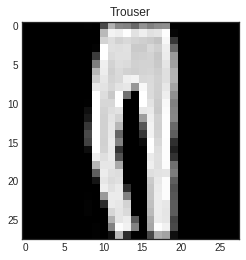

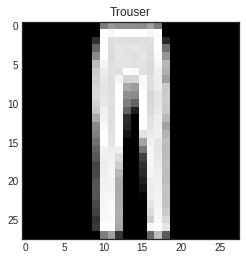

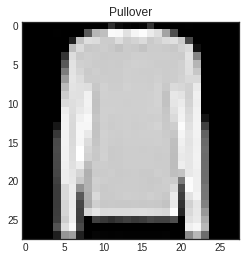

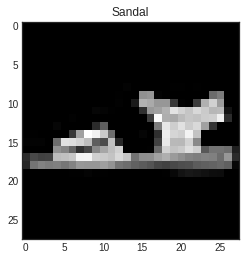

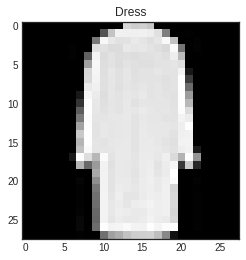

In [37]:
for image, label in train_ds.take(5):
  plt.title("{}".format(class_names[label[0]]))
  plt.imshow(image[0, :, :], cmap='gray')
  plt.show()

### 모델 생성
- 임의의 모델

In [38]:
def build_model():
  input = Input(shape=(28, 28), name='input')
  flatten = Flatten(input_shape=[28, 28], name='flatten')(input)
  hidden1 = Dense(256, kernel_initializer='he_normal', name='hidden1')(flatten)
  hidden1 = BatchNormalization()(hidden1)
  hidden1 = Activation('relu')(hidden1)
  dropout1 = Dropout(0.5)(hidden1)
  
  hidden2 = Dense(100, kernel_initializer='he_normal', name='hidden2')(dropout1)
  hidden2 = BatchNormalization()(hidden2)
  hidden2 = Activation('relu')(hidden2)
  dropout2 = Dropout(0.5)(hidden2)
  
  hidden3 = Dense(100, kernel_initializer='he_normal', name='hidden3')(dropout2)
  hidden3 = BatchNormalization()(hidden3)
  hidden3 = Activation('relu')(hidden3)
  dropout3 = Dropout(0.5)(hidden3)
  
  hidden4 = Dense(50, kernel_initializer='he_normal', name='hidden4')(dropout3)
  hidden4 = BatchNormalization()(hidden4)
  hidden4 = Activation('relu')(hidden4)
  dropout4 = Dropout(0.5)(hidden4)

  output = Dense(10, activation='softmax', name='output')(dropout4)

  model = Model(inputs=[input], outputs=[output])
  
  return model

In [39]:
model = build_model()

In [40]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 28, 28)]          0         
                                                                 
 flatten (Flatten)           (None, 784)               0         
                                                                 
 hidden1 (Dense)             (None, 256)               200960    
                                                                 
 batch_normalization (BatchN  (None, 256)              1024      
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 256)               0         
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                             

### 모델 컴파일
- 평가(metrics)방식의 다른 방법
  - `tf.keras.metrics.Mean`
  - `tf.keras.metrics.SparseCategoricalAccuracy`

- 위 두 방식을 사용하여 loss값을 좀 더 smooth하게 만들기(평균을 내는 방식)

In [41]:
loss_object = tf.keras.losses.SparseCategoricalCrossentropy()
optimizer = tf.keras.optimizers.Adam()

In [42]:
train_loss = tf.keras.metrics.Mean(name='train_loss')
train_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(name='train_accuracy')

test_loss = tf.keras.metrics.Mean(name='test_loss')
test_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(name='test_accuracy')

### 모델 학습

@tf.function 으로 인해 학습이 시작되면 그래프를 생성하여 속도가 빠름


In [43]:
@tf.function
def train_step(images, labels):
  with tf.GradientTape() as tape:
    predictions = model(images)
    loss = loss_object(labels, predictions)

  gradients = tape.gradient(loss, model.trainable_variables)
  optimizer.apply_gradients(zip(gradients, model.trainable_variables))

  train_loss(loss)
  train_accuracy(labels, predictions)

In [44]:
@tf.function
def test_step(images, labels):
  predictions = model(images)
  t_loss = loss_object(labels, predictions)

  test_loss(t_loss)
  test_accuracy(labels, predictions)

In [45]:
epochs = 20

for epoch in range(epochs):
  for images, labels in train_ds:
    train_step(images, labels)

  for test_images, test_labels in test_ds:
    test_step(test_images, test_labels)

  template = "Epochs: {:3d}\tLoss: {:.4f}\tAccuracy: {:.4f}\tTest Loss: {:.4f}\tTest Accuracy: {:.4f}\t"
  print(template.format(epoch+1,
                        train_loss.result(),
                        train_accuracy.result()*100,
                        test_loss.result(),
                        test_accuracy.result()*100))

Epochs:   1	Loss: 0.4915	Accuracy: 82.0950	Test Loss: 0.4064	Test Accuracy: 85.1200	
Epochs:   2	Loss: 0.4319	Accuracy: 84.2283	Test Loss: 0.3998	Test Accuracy: 85.5550	
Epochs:   3	Loss: 0.3989	Accuracy: 85.4244	Test Loss: 0.3922	Test Accuracy: 85.8267	
Epochs:   4	Loss: 0.3769	Accuracy: 86.1963	Test Loss: 0.3811	Test Accuracy: 86.2750	
Epochs:   5	Loss: 0.3598	Accuracy: 86.7987	Test Loss: 0.3786	Test Accuracy: 86.3700	
Epochs:   6	Loss: 0.3462	Accuracy: 87.2761	Test Loss: 0.3722	Test Accuracy: 86.6017	
Epochs:   7	Loss: 0.3345	Accuracy: 87.6886	Test Loss: 0.3686	Test Accuracy: 86.7329	
Epochs:   8	Loss: 0.3242	Accuracy: 88.0369	Test Loss: 0.3651	Test Accuracy: 86.8525	
Epochs:   9	Loss: 0.3152	Accuracy: 88.3443	Test Loss: 0.3635	Test Accuracy: 86.9367	
Epochs:  10	Loss: 0.3072	Accuracy: 88.6260	Test Loss: 0.3613	Test Accuracy: 87.0580	
Epochs:  11	Loss: 0.2998	Accuracy: 88.8776	Test Loss: 0.3597	Test Accuracy: 87.1745	
Epochs:  12	Loss: 0.2931	Accuracy: 89.1151	Test Loss: 0.3584	Test

### 모델 학습 : 2번째 방법 (Keras)

In [46]:
from sklearn.model_selection import train_test_split

In [47]:
(x_train_full , y_train_full), (x_test, y_test) = load_data()

x_train, x_val, y_train, y_val = train_test_split(x_train_full, y_train_full,
                                                  test_size=0.3,
                                                  random_state=777)

x_train = x_train / 255.
x_val = x_val / 255.
x_test = x_test / 255.

print(x_train.shape)
print(y_train.shape)
print(x_val.shape)
print(y_val.shape)
print(x_test.shape)
print(y_test.shape)

model = build_model()
model.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

(42000, 28, 28)
(42000,)
(18000, 28, 28)
(18000,)
(10000, 28, 28)
(10000,)
Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 28, 28)]          0         
                                                                 
 flatten (Flatten)           (None, 784)               0         
                                                                 
 hidden1 (Dense)             (None, 256)               200960    
                                                                 
 batch_normalization_4 (Batc  (None, 256)              1024      
 hNormalization)                                                 
                                                                 
 activation_4 (Activation)   (None, 256)               0         
                                                                 
 dropout_4 (Dropout)         (None, 256)          

5~6분 소요

In [48]:
from tensorflow.keras.callbacks import EarlyStopping

In [49]:
early_stopping_cb = EarlyStopping(patience=3, monitor='val_loss',
                                  restore_best_weights=True)
history = model.fit(x_train, y_train,
                    batch_size=256,
                    epochs=200,
                    shuffle=True,
                    validation_data=(x_val, y_val),
                    callbacks=[early_stopping_cb])

Epoch 1/200
165/165 [==============================] - 2s 7ms/step - loss: 2.6048 - accuracy: 0.1318 - val_loss: 2.0428 - val_accuracy: 0.4957
Epoch 2/200
165/165 [==============================] - 1s 5ms/step - loss: 2.2677 - accuracy: 0.1955 - val_loss: 1.8108 - val_accuracy: 0.5995
Epoch 3/200
165/165 [==============================] - 1s 5ms/step - loss: 2.0554 - accuracy: 0.2589 - val_loss: 1.6120 - val_accuracy: 0.6180
Epoch 4/200
165/165 [==============================] - 1s 5ms/step - loss: 1.8895 - accuracy: 0.3175 - val_loss: 1.4440 - val_accuracy: 0.6224
Epoch 5/200
165/165 [==============================] - 1s 5ms/step - loss: 1.7531 - accuracy: 0.3640 - val_loss: 1.3128 - val_accuracy: 0.6414
Epoch 6/200
165/165 [==============================] - 1s 5ms/step - loss: 1.6406 - accuracy: 0.4069 - val_loss: 1.2089 - val_accuracy: 0.6528
Epoch 7/200
165/165 [==============================] - 1s 5ms/step - loss: 1.5464 - accuracy: 0.4366 - val_loss: 1.1291 - val_accuracy: 0.6626

In [50]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

### 모델 평가

In [51]:
model.evaluate(x_test, y_test, batch_size=100)

100/100 [==============================] - 0s 2ms/step - loss: 0.4978 - accuracy: 0.8263


[0.4978007376194, 0.8263000249862671]

### 결과 확인

In [52]:
test_img = x_test[0, :, :]
print(test_img.shape)

(28, 28)


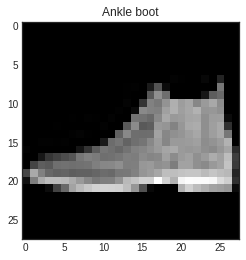

In [54]:
plt.title(class_names[y_test[0]])
plt.imshow(test_img, cmap='gray')
plt.show()

In [55]:
pred = model.predict(test_img.reshape(1, 28, 28))

In [56]:
pred.shape

(1, 10)

In [57]:
pred

array([[1.5048502e-04, 1.1987693e-04, 4.1007507e-04, 2.6749129e-05,
        4.4331970e-05, 6.4292811e-02, 1.6104321e-04, 1.9493331e-01,
        3.6805455e-04, 7.3949331e-01]], dtype=float32)

In [58]:
class_names[np.argmax(pred)]

'Ankle boot'

### Test Batch Dataset

In [59]:
test_batch = x_test[:32, :, :]
test_batch_y = y_test[:32]
print(test_batch.shape)

(32, 28, 28)


In [60]:
preds = model.predict(test_batch)
preds.shape

(32, 10)

In [61]:
preds_arg = np.argmax(preds, -1)

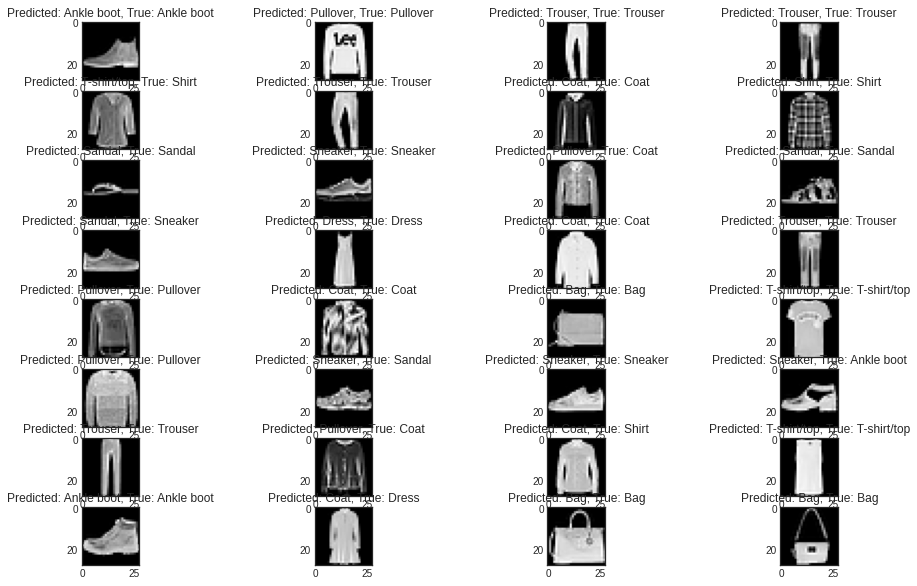

In [62]:
num_rows = 8
num_cols = 4
numimages = num_rows * num_cols

plt.figure(figsize=(16, 10))

for idx in range(1, 33, 1):
  plt.subplot(num_rows, num_cols, idx)
  plt.title("Predicted: {}, True: {}".format(class_names[preds_arg[idx-1]],
                                             class_names[test_batch_y[idx-1]]))
  plt.imshow(test_batch[idx-1], cmap='gray')

plt.show()